In [1]:
import sys

sys.path.insert(0, '../utils')

In [2]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms.functional as TF
from tqdm import tqdm
import torch.optim as optim
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from collections import OrderedDict
import matplotlib.pyplot as plt
from Network import *
from DataSet import *
from train_procedure import *
from Aug import *
from torchvision import transforms
import pickle

%load_ext autoreload
%autoreload 2

In [2]:
# Create the augmented dataset
create_augmented_dataset(True)

satImage_100.png: 100%|███████████████████████████████████████████████████████████| 100/100 [00:50<00:00,  2.00image/s]


In [3]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
dict_train ={"save_model": True,
             'num_model': 2,
            "cross_val": False,
            "skip_connection": True,
            "num_epochs": 400,
            "n_splits": 1,
            "batch_size": 10,
            "scale_channel": 1,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": 0.0,
                "use_dropout": False,
                "bias": False},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": 1e-05,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "ReduceLROnPlateau",
            "scheduler": torch.optim.lr_scheduler.ReduceLROnPlateau,
            "param_scheduler": {"mode": 'max',
                               "factor": 1./np.sqrt(10),
                               'min_lr': 1e-07,
                               'patience': 2,
                               'verbose': True},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }

experiment_final1 = {"param": dict_train}
experiment_final1["convergence_path"] = run_training(dict_train) 


f = open("result_exp/experiment_final2.pkl","wb")
pickle.dump(experiment_final1,f)
f.close()

100%|████████████████████████████████████████████████████████████████████| 220/220 [01:19<00:00,  2.77it/s, loss=0.513]


Training set: epoch-1 got 129430288/172480000 with acc 75.04%, F1-score 0.42 and loss 0.5386555790901184 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.484]


Training set: epoch-2 got 139906873/172480000 with acc 81.11%, F1-score 0.46 and loss 0.4211682975292206 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.44it/s, loss=0.517]


Training set: epoch-3 got 140484110/172480000 with acc 81.45%, F1-score 0.47 and loss 0.40093401074409485 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.518]


Training set: epoch-4 got 141398436/172480000 with acc 81.98%, F1-score 0.48 and loss 0.3914279043674469 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:02<00:00,  3.49it/s, loss=0.533]


Training set: epoch-5 got 142409208/172480000 with acc 82.57%, F1-score 0.51 and loss 0.37868908047676086 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:02<00:00,  3.49it/s, loss=0.526]


Training set: epoch-6 got 143417589/172480000 with acc 83.15%, F1-score 0.53 and loss 0.36824917793273926 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.49it/s, loss=0.525]


Training set: epoch-7 got 143879468/172480000 with acc 83.42%, F1-score 0.54 and loss 0.36362653970718384 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.524]


Training set: epoch-8 got 144829101/172480000 with acc 83.97%, F1-score 0.56 and loss 0.35519516468048096 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.49it/s, loss=0.504]


Training set: epoch-9 got 145619006/172480000 with acc 84.43%, F1-score 0.57 and loss 0.34803709387779236 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.49it/s, loss=0.507]


Training set: epoch-10 got 146366424/172480000 with acc 84.86%, F1-score 0.59 and loss 0.33865126967430115 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.49it/s, loss=0.519]


Training set: epoch-11 got 146390405/172480000 with acc 84.87%, F1-score 0.59 and loss 0.33896392583847046 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.524]


Training set: epoch-12 got 147088365/172480000 with acc 85.28%, F1-score 0.60 and loss 0.3307943642139435 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.536]


Training set: epoch-13 got 147701385/172480000 with acc 85.63%, F1-score 0.62 and loss 0.32307741045951843 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.56]


Training set: epoch-14 got 148234628/172480000 with acc 85.94%, F1-score 0.63 and loss 0.3166980743408203 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.53]


Training set: epoch-15 got 148794263/172480000 with acc 86.27%, F1-score 0.64 and loss 0.31157544255256653 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.548]


Training set: epoch-16 got 148675212/172480000 with acc 86.20%, F1-score 0.63 and loss 0.3115690350532532 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.49it/s, loss=0.519]


Training set: epoch-17 got 149935713/172480000 with acc 86.93%, F1-score 0.65 and loss 0.2974693179130554 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.514]


Training set: epoch-18 got 150037173/172480000 with acc 86.99%, F1-score 0.66 and loss 0.29562363028526306 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.499]


Training set: epoch-19 got 150916042/172480000 with acc 87.50%, F1-score 0.67 and loss 0.28672274947166443 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.505]


Training set: epoch-20 got 151186873/172480000 with acc 87.65%, F1-score 0.67 and loss 0.28481268882751465 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.506]


Training set: epoch-21 got 151853609/172480000 with acc 88.04%, F1-score 0.68 and loss 0.27678754925727844 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.478]


Training set: epoch-22 got 152641676/172480000 with acc 88.50%, F1-score 0.70 and loss 0.2686520516872406 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.426]


Training set: epoch-23 got 153313513/172480000 with acc 88.89%, F1-score 0.71 and loss 0.26114732027053833 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.466]


Training set: epoch-24 got 153977804/172480000 with acc 89.27%, F1-score 0.72 and loss 0.2546274662017822 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.431]


Training set: epoch-25 got 154528123/172480000 with acc 89.59%, F1-score 0.73 and loss 0.24862347543239594 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.399]


Training set: epoch-26 got 155580794/172480000 with acc 90.20%, F1-score 0.75 and loss 0.23691576719284058 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.387]


Training set: epoch-27 got 156217894/172480000 with acc 90.57%, F1-score 0.76 and loss 0.22918729484081268 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.367]


Training set: epoch-28 got 156707847/172480000 with acc 90.86%, F1-score 0.77 and loss 0.22357043623924255 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.358]


Training set: epoch-29 got 157158354/172480000 with acc 91.12%, F1-score 0.78 and loss 0.21657302975654602 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.353]


Training set: epoch-30 got 157410716/172480000 with acc 91.26%, F1-score 0.78 and loss 0.21431981027126312 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.328]


Training set: epoch-31 got 157873630/172480000 with acc 91.53%, F1-score 0.79 and loss 0.20655491948127747 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.327]


Training set: epoch-32 got 158175392/172480000 with acc 91.71%, F1-score 0.79 and loss 0.20319893956184387 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.309]


Training set: epoch-33 got 158517592/172480000 with acc 91.90%, F1-score 0.80 and loss 0.19859637320041656 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.295]


Training set: epoch-34 got 158752819/172480000 with acc 92.04%, F1-score 0.80 and loss 0.19633767008781433 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.287]


Training set: epoch-35 got 159109174/172480000 with acc 92.25%, F1-score 0.81 and loss 0.1912485957145691 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.276]


Training set: epoch-36 got 159315841/172480000 with acc 92.37%, F1-score 0.81 and loss 0.1889066845178604 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.273]


Training set: epoch-37 got 159667983/172480000 with acc 92.57%, F1-score 0.82 and loss 0.18384617567062378 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.269]


Training set: epoch-38 got 159900351/172480000 with acc 92.71%, F1-score 0.82 and loss 0.18090178072452545 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.262]


Training set: epoch-39 got 160091101/172480000 with acc 92.82%, F1-score 0.82 and loss 0.178427591919899 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.258]


Training set: epoch-40 got 160376349/172480000 with acc 92.98%, F1-score 0.83 and loss 0.17472955584526062 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.249]


Training set: epoch-41 got 160628790/172480000 with acc 93.13%, F1-score 0.83 and loss 0.17155972123146057 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.245]


Training set: epoch-42 got 160830842/172480000 with acc 93.25%, F1-score 0.83 and loss 0.16775967180728912 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.232]


Training set: epoch-43 got 161077273/172480000 with acc 93.39%, F1-score 0.84 and loss 0.16452965140342712 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.43it/s, loss=0.238]


Training set: epoch-44 got 160912824/172480000 with acc 93.29%, F1-score 0.83 and loss 0.1669403612613678 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.44it/s, loss=0.217]


Training set: epoch-45 got 161220355/172480000 with acc 93.47%, F1-score 0.84 and loss 0.16358236968517303 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.44it/s, loss=0.226]


Training set: epoch-46 got 161526822/172480000 with acc 93.65%, F1-score 0.84 and loss 0.1591167151927948 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.23]


Training set: epoch-47 got 161826732/172480000 with acc 93.82%, F1-score 0.85 and loss 0.15559327602386475 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.217]


Training set: epoch-48 got 161818299/172480000 with acc 93.82%, F1-score 0.85 and loss 0.1550922393798828 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.44it/s, loss=0.227]


Training set: epoch-49 got 162171714/172480000 with acc 94.02%, F1-score 0.85 and loss 0.1507009118795395 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.44it/s, loss=0.216]


Training set: epoch-50 got 162390293/172480000 with acc 94.15%, F1-score 0.86 and loss 0.14738829433918 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.216]


Training set: epoch-51 got 162535610/172480000 with acc 94.23%, F1-score 0.86 and loss 0.14487534761428833 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.44it/s, loss=0.211]


Training set: epoch-52 got 162663942/172480000 with acc 94.31%, F1-score 0.86 and loss 0.14341731369495392 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.44it/s, loss=0.201]


Training set: epoch-53 got 162603451/172480000 with acc 94.27%, F1-score 0.86 and loss 0.14377230405807495 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.44it/s, loss=0.211]


Training set: epoch-54 got 162924868/172480000 with acc 94.46%, F1-score 0.86 and loss 0.138901948928833 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.43it/s, loss=0.192]


Training set: epoch-55 got 163226643/172480000 with acc 94.64%, F1-score 0.87 and loss 0.13543662428855896 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.44it/s, loss=0.175]


Training set: epoch-56 got 163488313/172480000 with acc 94.79%, F1-score 0.87 and loss 0.13146793842315674 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.43it/s, loss=0.18]


Training set: epoch-57 got 163588321/172480000 with acc 94.84%, F1-score 0.87 and loss 0.13021256029605865 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.42it/s, loss=0.177]


Training set: epoch-58 got 163760816/172480000 with acc 94.94%, F1-score 0.88 and loss 0.12787480652332306 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.42it/s, loss=0.172]


Training set: epoch-59 got 164033985/172480000 with acc 95.10%, F1-score 0.88 and loss 0.12327923625707626 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.43it/s, loss=0.174]


Training set: epoch-60 got 164264470/172480000 with acc 95.24%, F1-score 0.88 and loss 0.11969979852437973 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.43it/s, loss=0.17]


Training set: epoch-61 got 164449100/172480000 with acc 95.34%, F1-score 0.89 and loss 0.11690951138734818 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.166]


Training set: epoch-62 got 164210382/172480000 with acc 95.21%, F1-score 0.88 and loss 0.11987317353487015 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.175]


Training set: epoch-63 got 163744539/172480000 with acc 94.94%, F1-score 0.88 and loss 0.12759175896644592 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.165]


Training set: epoch-64 got 164139706/172480000 with acc 95.16%, F1-score 0.88 and loss 0.12102451920509338 
Epoch 00064: reducing learning rate of group 0 to 1.5811e-04.


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.171]


Training set: epoch-65 got 164260386/172480000 with acc 95.23%, F1-score 0.88 and loss 0.11926432698965073 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.41it/s, loss=0.167]


Training set: epoch-66 got 164812821/172480000 with acc 95.55%, F1-score 0.89 and loss 0.11087170243263245 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.163]


Training set: epoch-67 got 165166375/172480000 with acc 95.76%, F1-score 0.90 and loss 0.10539832711219788 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.26it/s, loss=0.161]


Training set: epoch-68 got 165407525/172480000 with acc 95.90%, F1-score 0.90 and loss 0.1017611175775528 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.159]


Training set: epoch-69 got 165624840/172480000 with acc 96.03%, F1-score 0.90 and loss 0.09849973022937775 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.156]


Training set: epoch-70 got 165809162/172480000 with acc 96.13%, F1-score 0.91 and loss 0.09577535837888718 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.32it/s, loss=0.153]


Training set: epoch-71 got 165976877/172480000 with acc 96.23%, F1-score 0.91 and loss 0.09326914697885513 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.149]


Training set: epoch-72 got 166133682/172480000 with acc 96.32%, F1-score 0.91 and loss 0.0909171774983406 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.33it/s, loss=0.146]


Training set: epoch-73 got 166280391/172480000 with acc 96.41%, F1-score 0.91 and loss 0.0887003093957901 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.143]


Training set: epoch-74 got 166423167/172480000 with acc 96.49%, F1-score 0.92 and loss 0.08656138926744461 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.14]


Training set: epoch-75 got 166562459/172480000 with acc 96.57%, F1-score 0.92 and loss 0.08449504524469376 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.136]


Training set: epoch-76 got 166695377/172480000 with acc 96.65%, F1-score 0.92 and loss 0.08249112963676453 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.41it/s, loss=0.133]


Training set: epoch-77 got 166822521/172480000 with acc 96.72%, F1-score 0.92 and loss 0.08054307848215103 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.42it/s, loss=0.13]


Training set: epoch-78 got 166947943/172480000 with acc 96.79%, F1-score 0.92 and loss 0.07865048944950104 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.41it/s, loss=0.126]


Training set: epoch-79 got 167069219/172480000 with acc 96.86%, F1-score 0.92 and loss 0.07679349184036255 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.122]


Training set: epoch-80 got 167189307/172480000 with acc 96.93%, F1-score 0.93 and loss 0.07506569474935532 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.12]


Training set: epoch-81 got 167254406/172480000 with acc 96.97%, F1-score 0.93 and loss 0.07388710975646973 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.118]


Training set: epoch-82 got 167320589/172480000 with acc 97.01%, F1-score 0.93 and loss 0.0731406956911087 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.112]


Training set: epoch-83 got 167325743/172480000 with acc 97.01%, F1-score 0.93 and loss 0.0727592185139656 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.113]


Training set: epoch-84 got 167436432/172480000 with acc 97.08%, F1-score 0.93 and loss 0.07133635878562927 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.104]


Training set: epoch-85 got 167607733/172480000 with acc 97.18%, F1-score 0.93 and loss 0.06874993443489075 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.101]


Training set: epoch-86 got 167634191/172480000 with acc 97.19%, F1-score 0.93 and loss 0.06826963275671005 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.0997]


Training set: epoch-87 got 167728966/172480000 with acc 97.25%, F1-score 0.93 and loss 0.06696690618991852 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.0989]


Training set: epoch-88 got 167842664/172480000 with acc 97.31%, F1-score 0.94 and loss 0.06536321341991425 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.0927]


Training set: epoch-89 got 167958183/172480000 with acc 97.38%, F1-score 0.94 and loss 0.06369848549365997 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.0938]


Training set: epoch-90 got 167975684/172480000 with acc 97.39%, F1-score 0.94 and loss 0.0632004514336586 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0928]


Training set: epoch-91 got 168028685/172480000 with acc 97.42%, F1-score 0.94 and loss 0.06256914138793945 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0903]


Training set: epoch-92 got 168072699/172480000 with acc 97.44%, F1-score 0.94 and loss 0.0618266835808754 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.0928]


Training set: epoch-93 got 168151490/172480000 with acc 97.49%, F1-score 0.94 and loss 0.06074207276105881 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0878]


Training set: epoch-94 got 168204889/172480000 with acc 97.52%, F1-score 0.94 and loss 0.059761565178632736 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.0856]


Training set: epoch-95 got 168303844/172480000 with acc 97.58%, F1-score 0.94 and loss 0.05849757790565491 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0807]


Training set: epoch-96 got 168390087/172480000 with acc 97.63%, F1-score 0.94 and loss 0.05735566094517708 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0821]


Training set: epoch-97 got 168472656/172480000 with acc 97.68%, F1-score 0.94 and loss 0.05612804368138313 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.0816]


Training set: epoch-98 got 168444967/172480000 with acc 97.66%, F1-score 0.94 and loss 0.05626172572374344 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.0817]


Training set: epoch-99 got 168398091/172480000 with acc 97.63%, F1-score 0.94 and loss 0.05712532997131348 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.0746]


Training set: epoch-100 got 168589280/172480000 with acc 97.74%, F1-score 0.95 and loss 0.05442051589488983 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0785]


Training set: epoch-101 got 168587286/172480000 with acc 97.74%, F1-score 0.95 and loss 0.05433523654937744 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.0851]


Training set: epoch-102 got 168494072/172480000 with acc 97.69%, F1-score 0.94 and loss 0.055687882006168365 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.0735]


Training set: epoch-103 got 168645243/172480000 with acc 97.78%, F1-score 0.95 and loss 0.053749945014715195 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.0741]


Training set: epoch-104 got 168744449/172480000 with acc 97.83%, F1-score 0.95 and loss 0.052150897681713104 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0721]


Training set: epoch-105 got 168788096/172480000 with acc 97.86%, F1-score 0.95 and loss 0.05164980888366699 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.0685]


Training set: epoch-106 got 168894025/172480000 with acc 97.92%, F1-score 0.95 and loss 0.05007583275437355 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0671]


Training set: epoch-107 got 168973575/172480000 with acc 97.97%, F1-score 0.95 and loss 0.04888151213526726 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.38it/s, loss=0.0708]


Training set: epoch-108 got 169011834/172480000 with acc 97.99%, F1-score 0.95 and loss 0.048291075974702835 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0708]


Training set: epoch-109 got 168808322/172480000 with acc 97.87%, F1-score 0.95 and loss 0.05112214386463165 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0699]


Training set: epoch-110 got 168832544/172480000 with acc 97.89%, F1-score 0.95 and loss 0.05080246925354004 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0702]


Training set: epoch-111 got 168871545/172480000 with acc 97.91%, F1-score 0.95 and loss 0.05025457218289375 
Epoch 00111: reducing learning rate of group 0 to 5.0000e-05.


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.0813]


Training set: epoch-112 got 168674689/172480000 with acc 97.79%, F1-score 0.95 and loss 0.05263318866491318 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0686]


Training set: epoch-113 got 169009476/172480000 with acc 97.99%, F1-score 0.95 and loss 0.04804524779319763 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0643]


Training set: epoch-114 got 169163389/172480000 with acc 98.08%, F1-score 0.95 and loss 0.04600311070680618 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0609]


Training set: epoch-115 got 169277703/172480000 with acc 98.14%, F1-score 0.96 and loss 0.04451374709606171 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.0587]


Training set: epoch-116 got 169365646/172480000 with acc 98.19%, F1-score 0.96 and loss 0.043329641222953796 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.057]


Training set: epoch-117 got 169442501/172480000 with acc 98.24%, F1-score 0.96 and loss 0.042315419763326645 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0557]


Training set: epoch-118 got 169510333/172480000 with acc 98.28%, F1-score 0.96 and loss 0.04140384867787361 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0544]


Training set: epoch-119 got 169574695/172480000 with acc 98.32%, F1-score 0.96 and loss 0.040563587099313736 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.0532]


Training set: epoch-120 got 169630463/172480000 with acc 98.35%, F1-score 0.96 and loss 0.039805199950933456 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.052]


Training set: epoch-121 got 169686347/172480000 with acc 98.38%, F1-score 0.96 and loss 0.03907407447695732 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0511]


Training set: epoch-122 got 169729382/172480000 with acc 98.41%, F1-score 0.96 and loss 0.03847866877913475 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.0501]


Training set: epoch-123 got 169775463/172480000 with acc 98.43%, F1-score 0.96 and loss 0.037863507866859436 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0493]


Training set: epoch-124 got 169811879/172480000 with acc 98.45%, F1-score 0.96 and loss 0.03734836354851723 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0483]


Training set: epoch-125 got 169862186/172480000 with acc 98.48%, F1-score 0.96 and loss 0.03665490448474884 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0475]


Training set: epoch-126 got 169890032/172480000 with acc 98.50%, F1-score 0.96 and loss 0.03628406673669815 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0473]


Training set: epoch-127 got 169919110/172480000 with acc 98.52%, F1-score 0.96 and loss 0.03587939590215683 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0463]


Training set: epoch-128 got 169940118/172480000 with acc 98.53%, F1-score 0.96 and loss 0.035541608929634094 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0458]


Training set: epoch-129 got 169984053/172480000 with acc 98.55%, F1-score 0.97 and loss 0.03496547043323517 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.0447]


Training set: epoch-130 got 170003914/172480000 with acc 98.56%, F1-score 0.97 and loss 0.034672074019908905 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0445]


Training set: epoch-131 got 170047777/172480000 with acc 98.59%, F1-score 0.97 and loss 0.03409067168831825 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0435]


Training set: epoch-132 got 170074640/172480000 with acc 98.61%, F1-score 0.97 and loss 0.033706583082675934 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.043]


Training set: epoch-133 got 170113299/172480000 with acc 98.63%, F1-score 0.97 and loss 0.033199600875377655 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0421]


Training set: epoch-134 got 170148281/172480000 with acc 98.65%, F1-score 0.97 and loss 0.0327235572040081 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.0407]


Training set: epoch-135 got 170202924/172480000 with acc 98.68%, F1-score 0.97 and loss 0.03197415918111801 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.0399]


Training set: epoch-136 got 170252831/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03133004531264305 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.0393]


Training set: epoch-137 got 170276356/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03095366805791855 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.0398]


Training set: epoch-138 got 170285731/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030843226239085197 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.0384]


Training set: epoch-139 got 170315834/172480000 with acc 98.75%, F1-score 0.97 and loss 0.030386747792363167 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.0385]


Training set: epoch-140 got 170311373/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030390305444598198 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.0381]


Training set: epoch-141 got 170300380/172480000 with acc 98.74%, F1-score 0.97 and loss 0.0305020771920681 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.0391]


Training set: epoch-142 got 170309638/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030378079041838646 
Epoch 00142: reducing learning rate of group 0 to 1.5811e-05.


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.0517]


Training set: epoch-143 got 169885384/172480000 with acc 98.50%, F1-score 0.96 and loss 0.03593592718243599 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.36it/s, loss=0.0471]


Training set: epoch-144 got 169937915/172480000 with acc 98.53%, F1-score 0.96 and loss 0.03504524007439613 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.0446]


Training set: epoch-145 got 170035805/172480000 with acc 98.58%, F1-score 0.97 and loss 0.03375788778066635 
Epoch 00145: reducing learning rate of group 0 to 5.0000e-06.


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.0482]


Training set: epoch-146 got 169972244/172480000 with acc 98.55%, F1-score 0.97 and loss 0.03457285463809967 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.0466]


Training set: epoch-147 got 170050702/172480000 with acc 98.59%, F1-score 0.97 and loss 0.03352772071957588 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.0456]


Training set: epoch-148 got 170090305/172480000 with acc 98.61%, F1-score 0.97 and loss 0.03300482779741287 
Epoch 00148: reducing learning rate of group 0 to 1.5811e-06.


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.0421]


Training set: epoch-149 got 170126774/172480000 with acc 98.64%, F1-score 0.97 and loss 0.0325794517993927 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.0417]


Training set: epoch-150 got 170151764/172480000 with acc 98.65%, F1-score 0.97 and loss 0.03224271535873413 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0415]


Training set: epoch-151 got 170163617/172480000 with acc 98.66%, F1-score 0.97 and loss 0.03208087384700775 
Epoch 00151: reducing learning rate of group 0 to 5.0000e-07.


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0406]


Training set: epoch-152 got 170182004/172480000 with acc 98.67%, F1-score 0.97 and loss 0.031877629458904266 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0403]


Training set: epoch-153 got 170192969/172480000 with acc 98.67%, F1-score 0.97 and loss 0.03171088919043541 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.0401]


Training set: epoch-154 got 170197717/172480000 with acc 98.68%, F1-score 0.97 and loss 0.031642552465200424 
Epoch 00154: reducing learning rate of group 0 to 1.5811e-07.


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.0399]


Training set: epoch-155 got 170209073/172480000 with acc 98.68%, F1-score 0.97 and loss 0.03150787577033043 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0398]


Training set: epoch-156 got 170210883/172480000 with acc 98.68%, F1-score 0.97 and loss 0.03147416189312935 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.35it/s, loss=0.0398]


Training set: epoch-157 got 170212358/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03145145624876022 
Epoch 00157: reducing learning rate of group 0 to 1.0000e-07.


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0397]


Training set: epoch-158 got 170215380/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03141292184591293 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0397]


Training set: epoch-159 got 170216115/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031401410698890686 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0396]


Training set: epoch-160 got 170216863/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03139127045869827 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0396]


Training set: epoch-161 got 170217477/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031381797045469284 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.33it/s, loss=0.0396]


Training set: epoch-162 got 170218147/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03137291967868805 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.33it/s, loss=0.0396]


Training set: epoch-163 got 170218634/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03136488050222397 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.33it/s, loss=0.0395]


Training set: epoch-164 got 170219130/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031356871128082275 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.33it/s, loss=0.0395]


Training set: epoch-165 got 170219581/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03134896606206894 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0395]


Training set: epoch-166 got 170220078/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031341273337602615 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.33it/s, loss=0.0395]


Training set: epoch-167 got 170220703/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03133346885442734 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.34it/s, loss=0.0395]


Training set: epoch-168 got 170221270/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03132593631744385 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.33it/s, loss=0.0394]


Training set: epoch-169 got 170221803/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03131869435310364 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.33it/s, loss=0.0394]


Training set: epoch-170 got 170222227/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031312379986047745 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.32it/s, loss=0.0394]


Training set: epoch-171 got 170222793/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03130386397242546 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.32it/s, loss=0.0394]


Training set: epoch-172 got 170223327/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031296972185373306 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.32it/s, loss=0.0394]


Training set: epoch-173 got 170223838/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03129002824425697 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.31it/s, loss=0.0394]


Training set: epoch-174 got 170224383/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031283073127269745 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.32it/s, loss=0.0394]


Training set: epoch-175 got 170224911/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031276434659957886 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.32it/s, loss=0.0394]


Training set: epoch-176 got 170225514/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03126984089612961 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.32it/s, loss=0.0394]


Training set: epoch-177 got 170225983/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03126353397965431 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.27it/s, loss=0.0393]


Training set: epoch-178 got 170226360/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031256791204214096 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0393]


Training set: epoch-179 got 170226808/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03125167638063431 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.32it/s, loss=0.0393]


Training set: epoch-180 got 170227384/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031243951991200447 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.32it/s, loss=0.0393]


Training set: epoch-181 got 170227895/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031237604096531868 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.31it/s, loss=0.0393]


Training set: epoch-182 got 170228396/172480000 with acc 98.69%, F1-score 0.97 and loss 0.031231220811605453 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.32it/s, loss=0.0393]


Training set: epoch-183 got 170228785/172480000 with acc 98.69%, F1-score 0.97 and loss 0.03122466802597046 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.31it/s, loss=0.0393]


Training set: epoch-184 got 170229442/172480000 with acc 98.70%, F1-score 0.97 and loss 0.0312180332839489 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.31it/s, loss=0.0393]


Training set: epoch-185 got 170229893/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031211791560053825 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0393]


Training set: epoch-186 got 170230356/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031205372884869576 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.31it/s, loss=0.0393]


Training set: epoch-187 got 170230798/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031199466437101364 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0392]


Training set: epoch-188 got 170231283/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031193220987915993 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.31it/s, loss=0.0392]


Training set: epoch-189 got 170231780/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031187349930405617 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0392]


Training set: epoch-190 got 170232242/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031181005761027336 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.31it/s, loss=0.0392]


Training set: epoch-191 got 170232681/172480000 with acc 98.70%, F1-score 0.97 and loss 0.03117518685758114 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0392]


Training set: epoch-192 got 170233129/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031169060617685318 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0392]


Training set: epoch-193 got 170233590/172480000 with acc 98.70%, F1-score 0.97 and loss 0.03116288036108017 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0392]


Training set: epoch-194 got 170234010/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031157080084085464 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0392]


Training set: epoch-195 got 170234322/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031151222065091133 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0392]


Training set: epoch-196 got 170234901/172480000 with acc 98.70%, F1-score 0.97 and loss 0.03114512749016285 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0392]


Training set: epoch-197 got 170235391/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031138990074396133 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0392]


Training set: epoch-198 got 170235835/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031132938340306282 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0392]


Training set: epoch-199 got 170236229/172480000 with acc 98.70%, F1-score 0.97 and loss 0.0311274416744709 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.30it/s, loss=0.0392]


Training set: epoch-200 got 170236719/172480000 with acc 98.70%, F1-score 0.97 and loss 0.03112182766199112 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.29it/s, loss=0.0392]


Training set: epoch-201 got 170237109/172480000 with acc 98.70%, F1-score 0.97 and loss 0.03111657127737999 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.29it/s, loss=0.0392]


Training set: epoch-202 got 170237515/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031110843643546104 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.29it/s, loss=0.0392]


Training set: epoch-203 got 170238015/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031105097383260727 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.29it/s, loss=0.0392]


Training set: epoch-204 got 170238462/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031099064275622368 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.29it/s, loss=0.0392]


Training set: epoch-205 got 170238936/172480000 with acc 98.70%, F1-score 0.97 and loss 0.03109344281256199 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.28it/s, loss=0.0392]


Training set: epoch-206 got 170239337/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031087726354599 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:06<00:00,  3.29it/s, loss=0.0392]


Training set: epoch-207 got 170239877/172480000 with acc 98.70%, F1-score 0.97 and loss 0.03108188323676586 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.28it/s, loss=0.0392]


Training set: epoch-208 got 170240285/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031076842918992043 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.24it/s, loss=0.0392]


Training set: epoch-209 got 170240697/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031071217730641365 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.27it/s, loss=0.0392]


Training set: epoch-210 got 170241130/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031065696850419044 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.28it/s, loss=0.0392]


Training set: epoch-211 got 170241565/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031060030683875084 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.28it/s, loss=0.0392]


Training set: epoch-212 got 170241997/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031054528430104256 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.27it/s, loss=0.0391]


Training set: epoch-213 got 170242383/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031049314886331558 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.27it/s, loss=0.0391]


Training set: epoch-214 got 170242703/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031043866649270058 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.27it/s, loss=0.0391]


Training set: epoch-215 got 170243264/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031038466840982437 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.26it/s, loss=0.0391]


Training set: epoch-216 got 170243657/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031032033264636993 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.27it/s, loss=0.0391]


Training set: epoch-217 got 170244001/172480000 with acc 98.70%, F1-score 0.97 and loss 0.03102799691259861 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.27it/s, loss=0.0391]


Training set: epoch-218 got 170244545/172480000 with acc 98.70%, F1-score 0.97 and loss 0.03102240525186062 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.27it/s, loss=0.0391]


Training set: epoch-219 got 170244900/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031017111614346504 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.27it/s, loss=0.0391]


Training set: epoch-220 got 170245327/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031012199819087982 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.25it/s, loss=0.0391]


Training set: epoch-221 got 170245753/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031006861478090286 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.27it/s, loss=0.0391]


Training set: epoch-222 got 170246012/172480000 with acc 98.70%, F1-score 0.97 and loss 0.031001422554254532 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.26it/s, loss=0.0391]


Training set: epoch-223 got 170246485/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03099629655480385 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.26it/s, loss=0.0391]


Training set: epoch-224 got 170246866/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030991151928901672 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.26it/s, loss=0.0391]


Training set: epoch-225 got 170247216/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030985146760940552 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.25it/s, loss=0.0391]


Training set: epoch-226 got 170247561/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030980966985225677 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.25it/s, loss=0.0391]


Training set: epoch-227 got 170248004/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030975887551903725 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.25it/s, loss=0.0391]


Training set: epoch-228 got 170248391/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03097071498632431 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.25it/s, loss=0.0391]


Training set: epoch-229 got 170248684/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030965639278292656 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.26it/s, loss=0.0391]


Training set: epoch-230 got 170249142/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030960259959101677 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.25it/s, loss=0.0391]


Training set: epoch-231 got 170249454/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030955329537391663 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.25it/s, loss=0.0391]


Training set: epoch-232 got 170249876/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030950265005230904 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.24it/s, loss=0.0391]


Training set: epoch-233 got 170250170/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03094543144106865 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.24it/s, loss=0.039]


Training set: epoch-234 got 170250675/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03093980997800827 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.24it/s, loss=0.039]


Training set: epoch-235 got 170250950/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030935456976294518 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.24it/s, loss=0.039]


Training set: epoch-236 got 170251249/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030930088832974434 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.23it/s, loss=0.039]


Training set: epoch-237 got 170251630/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030925218015909195 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.25it/s, loss=0.039]


Training set: epoch-238 got 170251959/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030919944867491722 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.24it/s, loss=0.039]


Training set: epoch-239 got 170252385/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03091530315577984 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.24it/s, loss=0.039]


Training set: epoch-240 got 170252788/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030910378322005272 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.24it/s, loss=0.039]


Training set: epoch-241 got 170253075/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03090570494532585 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.24it/s, loss=0.039]


Training set: epoch-242 got 170253451/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030900821089744568 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:07<00:00,  3.24it/s, loss=0.039]


Training set: epoch-243 got 170253842/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030896784737706184 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.23it/s, loss=0.039]


Training set: epoch-244 got 170254237/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030890613794326782 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.23it/s, loss=0.039]


Training set: epoch-245 got 170254624/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030885664746165276 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.22it/s, loss=0.039]


Training set: epoch-246 got 170255086/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03088054433465004 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.23it/s, loss=0.039]


Training set: epoch-247 got 170255492/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03087579272687435 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.23it/s, loss=0.039]


Training set: epoch-248 got 170255773/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03087063878774643 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.23it/s, loss=0.039]


Training set: epoch-249 got 170256201/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030865587294101715 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.22it/s, loss=0.039]


Training set: epoch-250 got 170256507/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030860895290970802 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.23it/s, loss=0.039]


Training set: epoch-251 got 170256887/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03085591457784176 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.22it/s, loss=0.039]


Training set: epoch-252 got 170257045/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03085256740450859 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.22it/s, loss=0.039]


Training set: epoch-253 got 170257525/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03084673173725605 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.22it/s, loss=0.0389]


Training set: epoch-254 got 170257897/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030841995030641556 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.22it/s, loss=0.0389]


Training set: epoch-255 got 170258388/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030837219208478928 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.22it/s, loss=0.0389]


Training set: epoch-256 got 170258757/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030832139775156975 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.23it/s, loss=0.0389]


Training set: epoch-257 got 170259081/172480000 with acc 98.71%, F1-score 0.97 and loss 0.0308277178555727 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.22it/s, loss=0.0389]


Training set: epoch-258 got 170259401/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030823076143860817 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.21it/s, loss=0.0389]


Training set: epoch-259 got 170259763/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030818399041891098 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.22it/s, loss=0.0389]


Training set: epoch-260 got 170260059/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03081393986940384 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.21it/s, loss=0.0389]


Training set: epoch-261 got 170260324/172480000 with acc 98.71%, F1-score 0.97 and loss 0.0308090690523386 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.20it/s, loss=0.0389]


Training set: epoch-262 got 170260722/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030804738402366638 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.21it/s, loss=0.0389]


Training set: epoch-263 got 170261005/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03079996258020401 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.21it/s, loss=0.0389]


Training set: epoch-264 got 170261337/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030795682221651077 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.20it/s, loss=0.0389]


Training set: epoch-265 got 170261776/172480000 with acc 98.71%, F1-score 0.97 and loss 0.03079075738787651 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.20it/s, loss=0.0389]


Training set: epoch-266 got 170262215/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030786190181970596 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.20it/s, loss=0.0389]


Training set: epoch-267 got 170262524/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030781373381614685 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.20it/s, loss=0.0389]


Training set: epoch-268 got 170262889/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030777208507061005 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.19it/s, loss=0.0389]


Training set: epoch-269 got 170263288/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030772289261221886 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.20it/s, loss=0.0389]


Training set: epoch-270 got 170263542/172480000 with acc 98.71%, F1-score 0.97 and loss 0.030767647549510002 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.20it/s, loss=0.0389]


Training set: epoch-271 got 170264060/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030762946233153343 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.19it/s, loss=0.0389]


Training set: epoch-272 got 170264354/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030758533626794815 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.20it/s, loss=0.0389]


Training set: epoch-273 got 170264792/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030753958970308304 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:08<00:00,  3.19it/s, loss=0.0389]


Training set: epoch-274 got 170265032/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030749524012207985 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.19it/s, loss=0.0389]


Training set: epoch-275 got 170265460/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03074485808610916 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.18it/s, loss=0.0389]


Training set: epoch-276 got 170265723/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030740633606910706 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.19it/s, loss=0.0389]


Training set: epoch-277 got 170266123/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03073589876294136 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.18it/s, loss=0.0389]


Training set: epoch-278 got 170266446/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030731774866580963 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.18it/s, loss=0.0389]


Training set: epoch-279 got 170266807/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030727047473192215 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.18it/s, loss=0.0389]


Training set: epoch-280 got 170267333/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03072202578186989 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.18it/s, loss=0.0389]


Training set: epoch-281 got 170267636/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030718566849827766 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.19it/s, loss=0.0389]


Training set: epoch-282 got 170267947/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030714044347405434 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.18it/s, loss=0.0388]


Training set: epoch-283 got 170268353/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030709585174918175 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.18it/s, loss=0.0388]


Training set: epoch-284 got 170268629/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030705299228429794 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.17it/s, loss=0.0388]


Training set: epoch-285 got 170268904/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030700786039233208 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.18it/s, loss=0.0388]


Training set: epoch-286 got 170269218/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030696067959070206 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.17it/s, loss=0.0388]


Training set: epoch-287 got 170269586/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03069170005619526 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.17it/s, loss=0.0388]


Training set: epoch-288 got 170269916/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030687276273965836 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.17it/s, loss=0.0388]


Training set: epoch-289 got 170270438/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030682124197483063 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.17it/s, loss=0.0388]


Training set: epoch-290 got 170270734/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03067915327847004 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.17it/s, loss=0.0388]


Training set: epoch-291 got 170270967/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030674712732434273 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.16it/s, loss=0.0388]


Training set: epoch-292 got 170271378/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030670154839754105 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.17it/s, loss=0.0388]


Training set: epoch-293 got 170271677/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03066578321158886 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.17it/s, loss=0.0388]


Training set: epoch-294 got 170272041/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03066147305071354 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.16it/s, loss=0.0388]


Training set: epoch-295 got 170272326/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030657196417450905 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.16it/s, loss=0.0388]


Training set: epoch-296 got 170272724/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030652781948447227 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.15it/s, loss=0.0388]


Training set: epoch-297 got 170273090/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030648475512862206 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.16it/s, loss=0.0388]


Training set: epoch-298 got 170273568/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030643535777926445 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.16it/s, loss=0.0388]


Training set: epoch-299 got 170273750/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030640292912721634 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.16it/s, loss=0.0388]


Training set: epoch-300 got 170274097/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030636141076683998 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.16it/s, loss=0.0388]


Training set: epoch-301 got 170274324/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03063187748193741 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.15it/s, loss=0.0388]


Training set: epoch-302 got 170274694/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030627626925706863 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.15it/s, loss=0.0388]


Training set: epoch-303 got 170274970/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030623264610767365 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.14it/s, loss=0.0388]


Training set: epoch-304 got 170275324/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03061896562576294 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.14it/s, loss=0.0387]


Training set: epoch-305 got 170275619/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030614802613854408 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.14it/s, loss=0.0387]


Training set: epoch-306 got 170275909/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03061075508594513 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.14it/s, loss=0.0387]


Training set: epoch-307 got 170276267/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030606403946876526 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.14it/s, loss=0.0387]


Training set: epoch-308 got 170276594/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030601998791098595 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0387]


Training set: epoch-309 got 170276871/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030597873032093048 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:09<00:00,  3.15it/s, loss=0.0387]


Training set: epoch-310 got 170277290/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030593743547797203 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.14it/s, loss=0.0387]


Training set: epoch-311 got 170277558/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030589384958148003 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.13it/s, loss=0.0387]


Training set: epoch-312 got 170277846/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03058531880378723 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.13it/s, loss=0.0387]


Training set: epoch-313 got 170278149/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03058145008981228 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.12it/s, loss=0.0387]


Training set: epoch-314 got 170278477/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030577046796679497 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.13it/s, loss=0.0387]


Training set: epoch-315 got 170278790/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030572490766644478 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.13it/s, loss=0.0387]


Training set: epoch-316 got 170279154/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030569326132535934 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.13it/s, loss=0.0387]


Training set: epoch-317 got 170279450/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030563959851861 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.13it/s, loss=0.0387]


Training set: epoch-318 got 170279831/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030559927225112915 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.13it/s, loss=0.0387]


Training set: epoch-319 got 170280089/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030555887147784233 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.13it/s, loss=0.0387]


Training set: epoch-320 got 170280350/172480000 with acc 98.72%, F1-score 0.97 and loss 0.030552033334970474 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0387]


Training set: epoch-321 got 170280777/172480000 with acc 98.72%, F1-score 0.97 and loss 0.03054790012538433 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.12it/s, loss=0.0387]


Training set: epoch-322 got 170281097/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030543845146894455 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.12it/s, loss=0.0387]


Training set: epoch-323 got 170281320/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03053981065750122 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0387]


Training set: epoch-324 got 170281658/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030535919591784477 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0386]


Training set: epoch-325 got 170281897/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03053293377161026 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.12it/s, loss=0.0386]


Training set: epoch-326 got 170282270/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03052770532667637 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.12it/s, loss=0.0386]


Training set: epoch-327 got 170282480/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030523955821990967 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.10it/s, loss=0.0386]


Training set: epoch-328 got 170282921/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03051987662911415 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.12it/s, loss=0.0386]


Training set: epoch-329 got 170283065/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03051598183810711 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0386]


Training set: epoch-330 got 170283477/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030511924996972084 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0386]


Training set: epoch-331 got 170283794/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030508065596222878 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0386]


Training set: epoch-332 got 170284029/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030504049733281136 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.10it/s, loss=0.0386]


Training set: epoch-333 got 170284386/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030499951913952827 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0386]


Training set: epoch-334 got 170284708/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03049577958881855 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.10it/s, loss=0.0386]


Training set: epoch-335 got 170285062/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030491705983877182 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.10it/s, loss=0.0386]


Training set: epoch-336 got 170285402/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030488112941384315 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.10it/s, loss=0.0386]


Training set: epoch-337 got 170285651/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030483772978186607 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.04it/s, loss=0.0386]


Training set: epoch-338 got 170285817/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03048008866608143 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.08it/s, loss=0.0386]


Training set: epoch-339 got 170286214/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03047572262585163 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0386]


Training set: epoch-340 got 170286614/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03047199733555317 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.10it/s, loss=0.0386]


Training set: epoch-341 got 170286950/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030468134209513664 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0386]


Training set: epoch-342 got 170287219/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030464427545666695 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0386]


Training set: epoch-343 got 170287479/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03046034835278988 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.11it/s, loss=0.0386]


Training set: epoch-344 got 170287808/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03045634925365448 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.09it/s, loss=0.0386]


Training set: epoch-345 got 170288107/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030452465638518333 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.10it/s, loss=0.0386]


Training set: epoch-346 got 170288485/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03044871799647808 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:10<00:00,  3.10it/s, loss=0.0386]


Training set: epoch-347 got 170288734/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03044428676366806 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.09it/s, loss=0.0386]


Training set: epoch-348 got 170288988/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030440444126725197 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.10it/s, loss=0.0386]


Training set: epoch-349 got 170289303/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030436735600233078 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.10it/s, loss=0.0386]


Training set: epoch-350 got 170289627/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030432941392064095 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.09it/s, loss=0.0386]


Training set: epoch-351 got 170289816/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03042878769338131 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.09it/s, loss=0.0386]


Training set: epoch-352 got 170290143/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030425092205405235 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.09it/s, loss=0.0386]


Training set: epoch-353 got 170290522/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030420459806919098 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.09it/s, loss=0.0386]


Training set: epoch-354 got 170290849/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030417079105973244 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.08it/s, loss=0.0385]


Training set: epoch-355 got 170291025/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030413400381803513 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.09it/s, loss=0.0385]


Training set: epoch-356 got 170291361/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030409667640924454 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.08it/s, loss=0.0385]


Training set: epoch-357 got 170291659/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03040555864572525 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.08it/s, loss=0.0385]


Training set: epoch-358 got 170292001/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03040185011923313 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.08it/s, loss=0.0385]


Training set: epoch-359 got 170292263/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030397789552807808 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.08it/s, loss=0.0385]


Training set: epoch-360 got 170292484/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03039403446018696 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.08it/s, loss=0.0385]


Training set: epoch-361 got 170292725/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030390160158276558 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.07it/s, loss=0.0385]


Training set: epoch-362 got 170293138/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030385470017790794 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.07it/s, loss=0.0385]


Training set: epoch-363 got 170293343/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030382588505744934 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.07it/s, loss=0.0385]


Training set: epoch-364 got 170293623/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03037893958389759 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.05it/s, loss=0.0385]


Training set: epoch-365 got 170293877/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030374981462955475 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.07it/s, loss=0.0385]


Training set: epoch-366 got 170294316/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030371038243174553 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.07it/s, loss=0.0385]


Training set: epoch-367 got 170294524/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030367432162165642 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.07it/s, loss=0.0385]


Training set: epoch-368 got 170294897/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030363835394382477 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.06it/s, loss=0.0385]


Training set: epoch-369 got 170295117/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030359795317053795 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.06it/s, loss=0.0385]


Training set: epoch-370 got 170295550/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03035617619752884 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.06it/s, loss=0.0385]


Training set: epoch-371 got 170295842/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03035152330994606 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.05it/s, loss=0.0385]


Training set: epoch-372 got 170296010/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030348772183060646 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:11<00:00,  3.06it/s, loss=0.0385]


Training set: epoch-373 got 170296386/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030344892293214798 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.05it/s, loss=0.0385]


Training set: epoch-374 got 170296590/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030341004952788353 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.05it/s, loss=0.0385]


Training set: epoch-375 got 170296932/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03033713810145855 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.04it/s, loss=0.0384]


Training set: epoch-376 got 170297188/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03033328428864479 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.03it/s, loss=0.0384]


Training set: epoch-377 got 170297425/172480000 with acc 98.73%, F1-score 0.97 and loss 0.030329672619700432 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.04it/s, loss=0.0384]


Training set: epoch-378 got 170297817/172480000 with acc 98.73%, F1-score 0.97 and loss 0.03032604418694973 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.04it/s, loss=0.0384]


Training set: epoch-379 got 170297985/172480000 with acc 98.73%, F1-score 0.97 and loss 0.0303224828094244 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.03it/s, loss=0.0384]


Training set: epoch-380 got 170298353/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030318554490804672 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.03it/s, loss=0.0384]


Training set: epoch-381 got 170298480/172480000 with acc 98.74%, F1-score 0.97 and loss 0.03031512349843979 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:13<00:00,  3.00it/s, loss=0.0384]


Training set: epoch-382 got 170298846/172480000 with acc 98.74%, F1-score 0.97 and loss 0.03031156398355961 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:12<00:00,  3.03it/s, loss=0.0384]


Training set: epoch-383 got 170299090/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030307790264487267 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:13<00:00,  3.00it/s, loss=0.0384]


Training set: epoch-384 got 170299296/172480000 with acc 98.74%, F1-score 0.97 and loss 0.03030397556722164 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:15<00:00,  2.92it/s, loss=0.0384]


Training set: epoch-385 got 170299624/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030300574377179146 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:15<00:00,  2.92it/s, loss=0.0384]


Training set: epoch-386 got 170299821/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030296992510557175 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:14<00:00,  2.96it/s, loss=0.0384]


Training set: epoch-387 got 170300191/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030293283984065056 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:18<00:00,  2.79it/s, loss=0.0384]


Training set: epoch-388 got 170300432/172480000 with acc 98.74%, F1-score 0.97 and loss 0.0302897859364748 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:18<00:00,  2.81it/s, loss=0.0384]


Training set: epoch-389 got 170300626/172480000 with acc 98.74%, F1-score 0.97 and loss 0.03028673119843006 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:21<00:00,  2.70it/s, loss=0.0384]


Training set: epoch-390 got 170301062/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030281759798526764 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:17<00:00,  2.85it/s, loss=0.0384]


Training set: epoch-391 got 170301436/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030278000980615616 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:16<00:00,  2.87it/s, loss=0.0384]


Training set: epoch-392 got 170301719/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030274314805865288 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:17<00:00,  2.84it/s, loss=0.0384]


Training set: epoch-393 got 170301983/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030271057039499283 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:17<00:00,  2.85it/s, loss=0.0384]


Training set: epoch-394 got 170302226/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030267205089330673 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:17<00:00,  2.84it/s, loss=0.0384]


Training set: epoch-395 got 170302414/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030263694003224373 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:20<00:00,  2.73it/s, loss=0.0384]


Training set: epoch-396 got 170302823/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030259963124990463 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:18<00:00,  2.80it/s, loss=0.0384]


Training set: epoch-397 got 170302911/172480000 with acc 98.74%, F1-score 0.97 and loss 0.0302566047757864 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:18<00:00,  2.81it/s, loss=0.0383]


Training set: epoch-398 got 170303347/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030253816395998 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:17<00:00,  2.83it/s, loss=0.0383]


Training set: epoch-399 got 170303643/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030249275267124176 


100%|███████████████████████████████████████████████████████████████████| 220/220 [01:19<00:00,  2.77it/s, loss=0.0383]


Training set: epoch-400 got 170303964/172480000 with acc 98.74%, F1-score 0.97 and loss 0.030245434492826462 


In [24]:
exp_4_

{'param': {'save_model': True,
  'num_model': 1,
  'cross_val': False,
  'skip_connection': True,
  'num_epochs': 60,
  'n_splits': 1,
  'batch_size': 10,
  'scale_channel': 1,
  'dict_double_conv': {'BatchNorm': True,
   'activation': ELU(alpha=1.0, inplace=True),
   'p_dropout': 0.0,
   'use_dropout': False,
   'bias': False},
  'dict_ups': {'BatchNorm': False,
   'p_dropout': 0.2,
   'use_dropout': False,
   'bias': False},
  'loss': BCEWithLogitsLoss(),
  'optimizer': torch.optim.adam.Adam,
  'param_optimizer': {'weight_decay': 1e-05, 'lr': 0.0005},
  'use_scheduler': True,
  'type_scheduler': 'ReduceLROnPlateau',
  'scheduler': torch.optim.lr_scheduler.ReduceLROnPlateau,
  'param_scheduler': {'mode': 'max',
   'factor': 0.31622776601683794,
   'min_lr': 1e-07,
   'patience': 2,
   'verbose': True},
  'scaler': <torch.cuda.amp.grad_scaler.GradScaler at 0x7f9155b581c0>,
  'device': 'cuda'},
 'convergence_path': {'train_acc': [tensor(0.7730),
   tensor(0.8060),
   tensor(0.8246),
   

ValueError: operands could not be broadcast together with shapes (60,) (0,) 

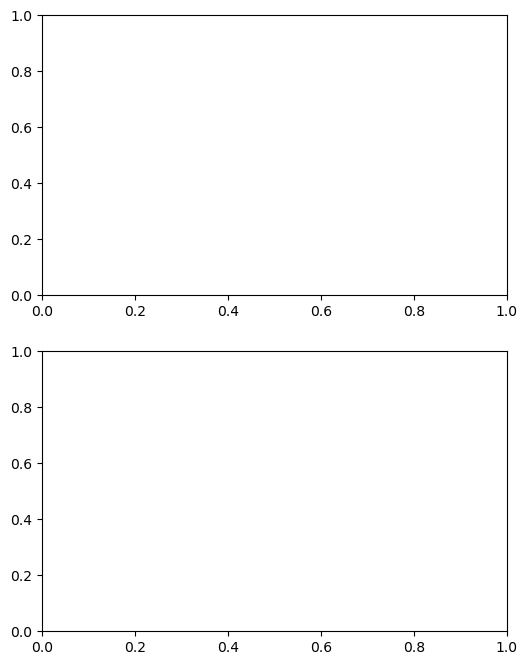

In [23]:
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)



f = open(f"result_exp/experiment_final1.pkl","rb")
exp_4_ = CPU_Unpickler(f).load()
f.close()


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8))

y = 0.5*(np.array(exp_4_["convergence_path"]["train_F1"]) + np.array(exp_4_["convergence_path"]["val_F1"]))
ax1.plot(np.arange(1,len(y)+1),y,label=r"p=0, $n_{batch} = 10$, $\lambda=0$")
y = 0.5*(np.array(exp_4_["convergence_path"]["train_acc"]) + np.array(exp_4_["convergence_path"]["val_acc"]))
ax2.plot(np.arange(1,len(y)+1),y,'-',label=r"p=0, $n_{batch} = 10$, $\lambda=0$")
    

ax2.legend()
ax1.legend()
ax1.set_title('Validation F1 score')
ax2.set_title('Validation Accuracy')
fig.supxlabel('epoch',y=0.05)
#plt.savefig('Figure/val_acc_3.pdf', dpi=300, bbox_inches='tight')
plt.show()